In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
from datetime import date
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm





In [58]:
def save_my_work(model, logfile, xdata_name, opt, N, Bsize, learningRate, epoch, second_time, best_mse, mse, loss, init_time):
    model_save_time = str(int(time.time()))
    model_file_name = '/content/drive/MyDrive/0_318lab/SCMP_ML/'+'model' + model_save_time + '.pt'
    torch.save(model, model_file_name )
    print(
                    datetime.now(),
                    'data:', xdata_name,
                    file=logfile
    )
    print(
                    ', layer_dim_list:', dim_list,
                    'activateion:', act,
                    ', optimizer:', opt,
                    ', n_of_data:',N,
                    ', Bsize:', Bsize ,
                    ', learningRate:', learningRate ,
                    file=logfile
                    )
    print(
                ', epoch: %5d' % epoch,
                ', passed_time: %.3f' % ( ( ( time.time()-second_time ) )  / 60  ),  'm',

                ", minimum_RMSE: %.2f" % (best_mse),
                ', test_loss: %2f' % (mse),
                ', train_loss: %2f' % (loss),
                ', passed_time_accum: %.3f' % ( ( init_time - time.time() )  / 60  ),  'm',
                file=logfile
                )
    plt.plot(history)
    plt.yscale('log')
    plt.title('test_loss')
    plt.savefig(
                model_file_name[0:-3] + 'test_loss' + '.pdf',
                format="pdf",
                bbox_inches="tight"
                )
    plt.show()

    plt.plot(history_train)
    plt.title('train_loss')
    plt.yscale('log')
    plt.savefig(
                model_file_name[0:-3] + 'train_loss' + '.pdf',
                format="pdf",
                bbox_inches="tight"
                )
    plt.show()

In [59]:
def print_progress(epoch, mse, loss, second_time):
    print('epoch: %5d' % epoch,
        ', test_loss: {:7.1f}'.format(mse),
        ', train_loss: {:7.1f}'.format(loss),
        ', est_time: {:5.1f}'.format(( ( ( time.time()-second_time ) )  / 60  )),  'min,',
        'average_time: {:.2f}'.format( ( time.time()-second_time )/(epoch+1)), 's'
        )

In [34]:
N, D_in, D_out = 10000, 2, 1


# # m =1
# X2 = []
# y2 = []
# for j in range(N):
#     X2.append([])
#     #y.append([])
#     for i in range(D_out):
#         X2[-1].append( 1 )
#         X2[-1].append( np.random.uniform(low=-10.0, high=10.0, size=None) )
#         y2.append( (X2[-1][-1]**2) / (2*X2[-1][-2])  )


# X2 = torch.Tensor(X2)
# y2 = torch.Tensor(y2)


# # p =1
# X3 = []
# y3 = []
# for j in range(N):
#     X3.append([])
#     #y.append([])
#     for i in range(D_out):
#         X3[-1].append( np.random.uniform(low=0.1, high=10.0, size=None) )
#         X3[-1].append( 1 )
#         y3.append( (X3[-1][-1]**2) / (2*X3[-1][-2])  )


# X3 = torch.Tensor(X3)
# y3 = torch.Tensor(y3)

# # X2_test = torch.tensor(X2, dtype=torch.float32)
# # y2_test = torch.tensor(y2, dtype=torch.float32).reshape(-1, 1)
# # X3_test = torch.tensor(X3, dtype=torch.float32)
# # y3_test = torch.tensor(y3, dtype=torch.float32).reshape(-1, 1)

In [35]:

# X = torch.load('/content/drive/MyDrive/0_318lab/SCMP_ML/KEdataX_1000_1691036428.pt')
# y = torch.load('/content/drive/MyDrive/0_318lab/SCMP_ML/KEdataY_1000_1691036428.pt')
xdata_name = '/content/drive/MyDrive/0_318lab/SCMP_ML/data/KEdataX_N_' + str(N) + '_Interval_10_1691050560.pt'
ydata_name = '/content/drive/MyDrive/0_318lab/SCMP_ML/data/KEdataY_N_' + str(N) + '_Interval_10_1691050560.pt'
X = torch.load(xdata_name)
y = torch.load(ydata_name)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=False)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.7, shuffle=True)
# X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
#X_train = torch.tensor(X_train, dtype=torch.float32)
#y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
#X_test = torch.tensor(X_test, dtype=torch.float32)
#y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)




In [36]:
# df = px.data.iris()
# fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=y, size=torch.ones(len(y_pred))*0.001)
fig = px.scatter_3d(x=X_train[:,0], y=X_train[:,1], z=y_train) #size=torch.ones(len(y_pred))*0.001)
fig.update_traces(marker_size=1)
fig.show()

In [ ]:

#default

"""
try

activateion: Softplus , optimizer: Adam , n_of_data: 10000 , Bsize: 100 , learningRate: 0.0005 , minimum_RMSE: 27.47 , epoch:  3660 , test_loss: 595.456665 , train_loss: 14.215258 , layer_dim_list: [2, 20, 20, 20, 20, 1] , passed_time: 5.000 m , passed_time: -160.696 s

activateion: Softplus , optimizer: Adam , n_of_data: 10000 , Bsize: 100 , learningRate: 5e-05 , minimum_RMSE: 252.92 , epoch:  3668 , test_loss: 256.572418 , train_loss: 184.996445 , layer_dim_list: [2, 20, 20, 20, 20, 1] , passed_time: 5.000 m , passed_time: -170.736 s

activateion: Softplus , optimizer: Adam , n_of_data: 10000 , Bsize: 10 , learningRate: 0.005 , minimum_RMSE: 77.75 , epoch:   386 , test_loss: 3821.791748 , train_loss: 5.220962 , layer_dim_list: [2, 20, 20, 20, 20, 1] , passed_time: 5.010 m , passed_time: -30.134 s

activateion: Softplus , optimizer: Adam , n_of_data: 10000 , Bsize: 500 , learningRate: 0.001 , minimum_RMSE: 22.67 , epoch: 13813 , test_loss: 15479.684570 , train_loss: 1186.494629 , layer_dim_list: [2, 20, 20, 20, 20, 1] , passed_time: 5.000 m , passed_time: -205.868 s

"""
# for learningRate in range(10): #


dim_list = [2, 32, 64, 32, 16,  1]


f = open("/content/drive/MyDrive/0_318lab/SCMP_ML/log.txt", "a")
#If data is less complex and is having fewer dimensions or features then neural networks with 1 to 2 hidden layers would work.
# If data is having large dimensions or features then to get an optimum solution, 3 to 5 hidden layers can be used.

init_time = time.time()
print('start')
for act in [
            # 'LeakyReLU',
            # 'LogSigmoid',
            'Softplus']:

    for opt in [
                # 'Adadelta',
                # 'Adagrad',
                'Adam',
                # 'AdamW',
                # 'SparseAdam',
                # 'Adamax',
                # 'ASGD',
                # 'LBFGS',
                # 'NAdam',
                # 'RAdam',
                # 'RMSprop',
                # 'Rprop',
                # 'SGD'
                ]:
        try:
            # for Bsize in [ 10, 50, 100, 500]:
            # for Bsize in [ 10, 100, 1000]:
            for batch_size in [ 16]:

                # for learningRate in [ 1e-1, 1e-2, 1e-3, 1e-4,1e-5, 1e-6, ]:
                # for learningRate in [ 1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4, 1e-5, 5e-5, 1e-6, 5e-6, ]:
                for learningRate in [  1e-06 ]:

                    make_model = 'model = nn.Sequential('
                    for layer_num in range( len(dim_list) - 1 ):
                        if layer_num == len(dim_list) - 2:
                            make_model = make_model + 'nn.Linear(dim_list[' + str(layer_num) + '], dim_list[' + str(layer_num+1) + ']) )'
                        else:
                            # make_model = make_model + 'nn.Linear(dim_list[' + str(layer_num) + '], dim_list[' + str(layer_num+1) + ']), nn.LeakyReLU(),'
                            make_model = make_model + 'nn.Linear(dim_list[' + str(layer_num) + '], dim_list[' + str(layer_num+1) + ']), nn.' + act + '(),'


                    exec(make_model)

                    exec('optimizer = optim.' + opt + '(model.parameters(), lr=learningRate  )')

                    batch_start = torch.arange(0, len(X_train), batch_size)

                    # Hold the best model
                    best_mse = np.inf   # init to infinity
                    best_weights = None
                    history = []
                    history_train = []


                    # for epoch in range(n_epochs):
                    second_time = time.time()

                    epoch = 0
                    len_batch = len(X_train)
                    while(1):

                        model.train()

                        for start in range(0,len_batch, batch_size):

                            X_batch = X_train[start:start+batch_size] # 두번째 값이 길이를 초과해도 오류안뜨고 그냥 시작부터 끝까지 출력해주는 착한친구.
                            y_batch = y_train[start:start+batch_size]
                            # forward pass
                            y_pred = model(X_batch).squeeze()

                            before_loss = torch.mean( (y_pred/y_batch-1)**2 + (y_batch/y_pred-1)**2 + (y_pred-y_batch)**2 )

                            loss = before_loss**(1/2)

                            # backward pass
                            optimizer.zero_grad()
                            loss.backward()

                            # update weights
                            optimizer.step()

                        loss = float(loss)

                        history_train.append(loss)

                        model.eval()
                        y_pred = model(X_test).squeeze()
                        #print(y_pred)

                        before_loss = torch.mean(  (y_pred/y_test-1)**2 + (y_test/y_pred-1)**2 + (y_pred-y_test)**2 )

                        mse = before_loss**(1/2)

                        mse = float(mse)

                        history.append(mse)
                        if mse < best_mse:
                            best_mse = mse
                            best_weights = copy.deepcopy(model.state_dict())


                        if epoch % 100 == 0:
                            # print('epoch: %5d' % epoch, 'test_loss: %.2f' % (mse), 'train_loss: %.2f' % (loss), 'est_time: %.2f' % (( ( epoch_time ) / (epoch+1) ) / 60 * (n_epochs-epoch) ) ,'min', "epoch_time:", epoch_time, 's')
                            print_progress(epoch, mse, loss, second_time)
                            # print('{:.6}'.format(val))
                            # print("{:10.4f}".format(x))

                        # if (mse<10) or (str(mse)=='nan') or ( ( ( time.time()-second_time ) )  / 60 > 0.1  ):
                        if (mse<10) or (str(mse)=='nan'):
                            print_progress(epoch, mse, loss, second_time)
                            break
                        epoch = epoch + 1

                    # restore model and return best accuracy
                    model.load_state_dict(best_weights)
                    # print("MSE: %.2f" % best_mse)
                    # print("RMSE: %.2f" % np.sqrt(best_mse))
                    save_my_work(model, f, xdata_name, opt, N, batch_size, learningRate, epoch, second_time, best_mse, mse, loss, init_time)

                    print('finish--------------------------------------------------------------------------------------------------------------------------------------------------------')
                    print('')

        except:
            # os.mkdir('/content/drive/MyDrive/0_318lab/SCMP_ML/')
            save_my_work(model, f, xdata_name, opt, N, batch_size, learningRate, epoch, second_time, best_mse, mse, loss, init_time)

f.close()
print('all done')
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

start
epoch:     0 , test_loss:  6825.2 , train_loss:    18.8 , est_time:   0.0 min, average_time: 0.74 s
epoch:   100 , test_loss:  2951.9 , train_loss:    41.8 , est_time:   1.3 min, average_time: 0.77 s


In [52]:
best_mse

2343.5458984375

In [53]:
f

<_io.TextIOWrapper name='/content/drive/MyDrive/0_318lab/SCMP_ML/log.txt' mode='a' encoding='UTF-8'>

In [ ]:
# %%capture cap
f = open("/content/drive/MyDrive/0_318lab/SCMP_ML/log.txt", "a")
print(
                        datetime.now(),
                        'data:', xdata_name,
                        ', layer_dim_list:', dim_list,
                      'activateion:', act,
                      ', optimizer:', opt,
                      ', n_of_data:',N,
                      ', Bsize:', Bsize ,
                      ', learningRate:', learningRate ,
                      file=f
                      )
print(
                      ', epoch: %5d' % epoch,
                      ', passed_time: %.3f' % ( ( ( time.time()-second_time ) )  / 60  ),  'm',

                      ", minimum_RMSE: %.2f" % (best_mse),
                      ', test_loss: %2f' % (mse),
                      ', train_loss: %2f' % (loss),
                      ', passed_time_accum: %.3f' % ( ( init_time - time.time() )  / 60  ),  'm',
                      file=f
                      )
# print(cap, file=f)
f.close()

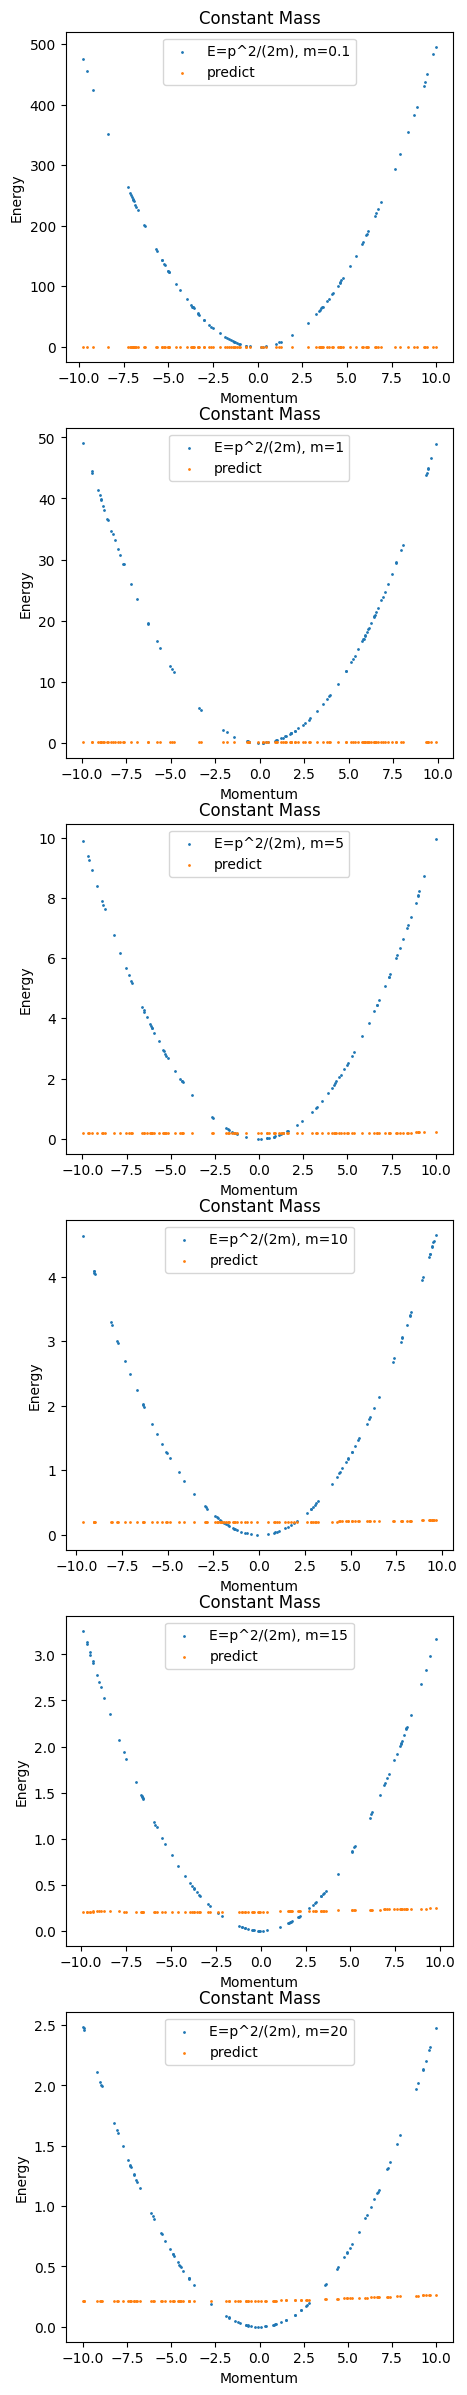

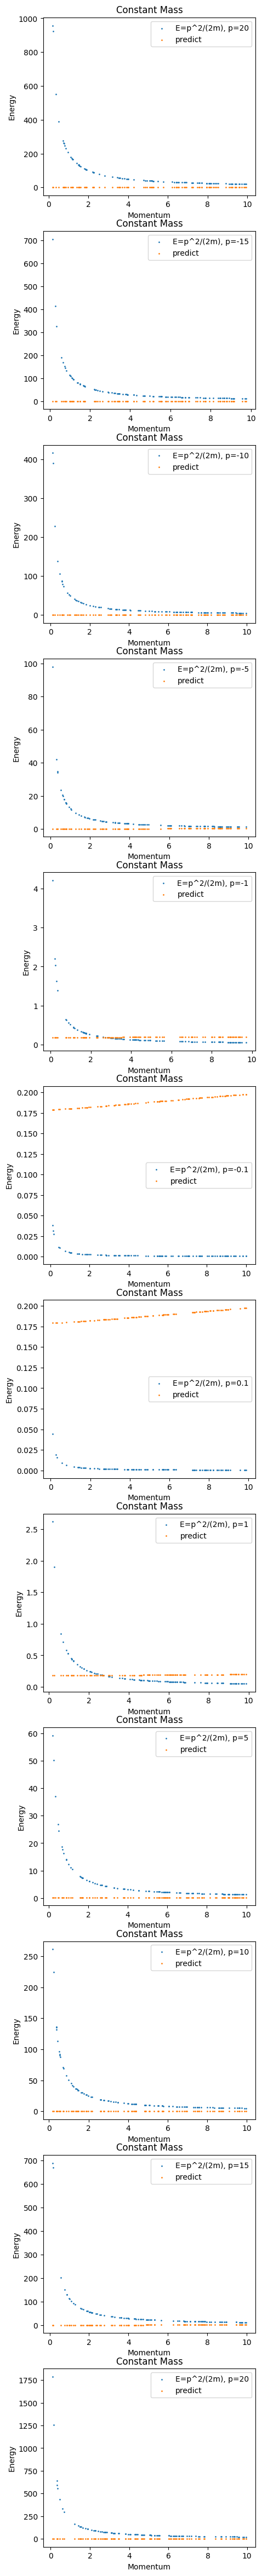

all done


In [61]:
N, D_in, D_out = 100, 2, 1

mass_num = [0.1, 1, 5, 10, 15, 20]
len_mass_num = len(mass_num)
fig, axs = plt.subplots(len_mass_num, 1, figsize=(5, 5*len_mass_num))#, sharey=True)
for k in range(len_mass_num):
    # m =1
    X2 = []
    y2 = []
    for j in range(N):
        X2.append([])
        #y.append([])
        for i in range(D_out):
            X2[-1].append( mass_num[k] )
            X2[-1].append( np.random.uniform(low=-10.0, high=10.0, size=None) )
            y2.append( (X2[-1][-1]**2) / (2*X2[-1][-2])  )


    X2 = torch.Tensor(X2)
    y2 = torch.Tensor(y2)



    model.eval()
    y_pred = model(X2)


    axs[k].scatter(X2[:,1], y2, label="E=p^2/(2m), m="+str(mass_num[k])+"", s=1)
    axs[k].scatter(X2[:,1].cpu().detach().numpy(), y_pred.cpu().detach().numpy(), label="predict", s=1)
    axs[k].legend()
    axs[k].set_xlabel('Momentum', fontsize=10)
    axs[k].set_ylabel(r'Energy', fontsize=10)
    # plt.ylabel("Y", rotation=0)
    axs[k].set_title('Constant Mass')

# plt.subplots_adjust(bottom=0.1, right=1, top=1.5)
    # axs[2].plot(names, values)
# fig.suptitle('Constant mass')


# ax.set_title('Volume and percent change')
# plt.savefig('/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('test') + '.png')
plt.savefig(
            '/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('P-E') + '_TestLoss_' + str(int(mse)) + '_TrainLoss_' + str(int(loss)) + '_'+str(int(time.time()))+'.pdf',
            format="pdf",
            bbox_inches="tight")

plt.show()



p_num = [20, -15, -10, -5, -1, -0.1, 0.1, 1, 5, 10, 15, 20]
len_p_num = len(p_num)
fig, axs = plt.subplots(len_p_num, 1, figsize=(5, 5*len_p_num))#, sharey=True)
for k in range(len_p_num):

    # p =1
    X3 = []
    y3 = []
    for j in range(N):
        X3.append([])
        #y.append([])
        for i in range(D_out):
            X3[-1].append( np.random.uniform(low=0.1, high=10.0, size=None) )
            X3[-1].append( p_num[k] )
            y3.append( (X3[-1][-1]**2) / (2*X3[-1][-2])  )


    X3 = torch.Tensor(X3)
    y3 = torch.Tensor(y3)


# model.eval()
# y_pred = model(X3)
# plt.scatter(X3[:,0].cpu().detach().numpy(),y_pred.cpu().detach().numpy(), marker='*')
# # plt.scatter(X3[:,1],y_pred, marker='*')
# plt.show()


# plt.scatter(X3[:,0] ,y3, marker='.', )
# plt.show()

# plt.scatter(X3[:,0].cpu().detach().numpy(),y_pred.cpu().detach().numpy(), marker='*')
# plt.scatter(X3[:,0] ,y3, marker='.', )
# plt.show()
    model.eval()
    y_pred = model(X3)
    axs[k].scatter(X3[:,0], y3, label="E=p^2/(2m), p="+str(p_num[k])+"", s=1)
    axs[k].scatter(X3[:,0].cpu().detach().numpy(), y_pred.cpu().detach().numpy(), label="predict", s=1)
    axs[k].legend()
    axs[k].set_xlabel('Momentum', fontsize=10)
    axs[k].set_ylabel(r'Energy', fontsize=10)
    # plt.ylabel("Y", rotation=0)
    axs[k].set_title('Constant Mass')

# plt.subplots_adjust(bottom=0.1, right=1, top=2)
    # axs[2].plot(names, values)
# fig.suptitle('Constant mass')


# ax.set_title('Volume and percent change')
# plt.savefig('/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('test') + '.png')
plt.savefig(
            '/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('M-E') + '_TestLoss_' + str(int(mse)) + '_TrainLoss_' + str(int(loss)) + '_'+str(int(time.time()))+'.pdf',
            format="pdf",
            bbox_inches="tight")

plt.show()





print('all done')



In [ ]:
plt.plot(history)
plt.yscale('log')
plt.title('test_loss')
plt.show()

plt.plot(history_train)
plt.title('train_loss')
plt.yscale('log')
plt.show()

NameError: ignored

In [ ]:
# when create new data

# N, D_in, H, D_out = 64, 1000, 100, 10
for m in [10, 100, 1000]:
    for k in [1000, 10000, 100000]:
        N, D_in, D_out = k, 2, 1

        # 입력과 출력 위한 랜덤 텐서
        X = []
        y = []
        for j in range(N):
            X.append([])
            #y.append([])
            for i in range(D_out):
                X[-1].append( np.random.uniform(low=0.1, high=10.0, size=None) )
                X[-1].append( np.random.uniform(low=-m, high=m, size=None) )
                y.append( (X[-1][-1]**2) / (2*X[-1][-2])  )


        X = torch.Tensor(X)
        y = torch.Tensor(y)

        # nn package를 이용하여 여러 층으로 정의된 모델 생성
        # nn.Sequential은 다른 모듈을 담을 수 있는 모듈이며 담겨진 모듈은 순서대로 연결
        # Linear 모듈은 곧 Affine 모듈

        # Read data
        # data = fetch_california_housing()
        # X, y = data.data, data.target

        # train-test split for model evaluation

        # import time
        # >>> # Save to file
        # >>> x = torch.tensor([0, 1, 2, 3, 4])
        # >>> torch.save(x, 'tensor.pt')

        torch.save(X, '/content/drive/MyDrive/0_318lab/SCMP_ML/'+'KEdataX_N_'+ str(N) +'_Interval_'+str(m)+'_'+str(int(time.time()))+'.pt' )
        torch.save(y, '/content/drive/MyDrive/0_318lab/SCMP_ML/'+'KEdataY_N_'+ str(N) +'_Interval_'+str(m)+'_'+str(int(time.time()))+'.pt' )
